## Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [91]:
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explatory Data Analysis

now I will explore the data to get insights about the data

In [92]:
df.shape

(3333, 21)

In [93]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [94]:
col_names = df.columns
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Types of variables  

In this section, I separate the dataset into categorical and numerical variables.

In [96]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [97]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


## Explore Problems within Categorical Variables

In [98]:
# check missing values in categorical variables

df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

In [99]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64


In [100]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


Phone number has very high cardinality which might not be useful for the model. Phone numbers are typically unique identifiers and don't provide meaningful information for prediction. I might consider dropping it.

In [101]:
# drop the phone number variable

df.drop('phone number', axis=1, inplace=True)

## Feature Engineering

### Explore `State` Variable

In [102]:
# print number of labels in state variable

print('State contains', len(df['state'].unique()), 'labels')

State contains 51 labels


In [103]:
# check labels in state variable

df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [104]:
# check frequency distribution of values in state variable

df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

### Explore `international plan` Variable

In [105]:
# print number of labels in International variable

print('International plan contains', len(df['international plan'].unique()), 'labels')

International plan contains 2 labels


In [106]:
# check frequency distribution of values in international plan variable

df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [107]:
pd.get_dummies(df['international plan'], drop_first=False, dtype='int').head()



,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


### Explore `voice mail plan` Variable

In [108]:
# print number of labels in Voice mail plan variable

print('voice mail plan contains', len(df['voice mail plan'].unique()), 'labels')

voice mail plan contains 2 labels


In [109]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [110]:
pd.get_dummies(df['voice mail plan'], drop_first=False, dtype='int').head()



,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


### Exploring Numerical Variables

In [111]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [112]:
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploring Numerical Variables

In [113]:


# check missing values in numerical variables

df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [114]:
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [115]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

In [116]:
import seaborn as sns
class BoxplotVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def draw_boxplots(self):
        # Set the style of seaborn for better aesthetics
        sns.set(style="whitegrid")
        
        # Iterate through each numerical column in the dataframe
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))  # Set the size of the figure
            sns.boxplot(x=self.dataframe[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()

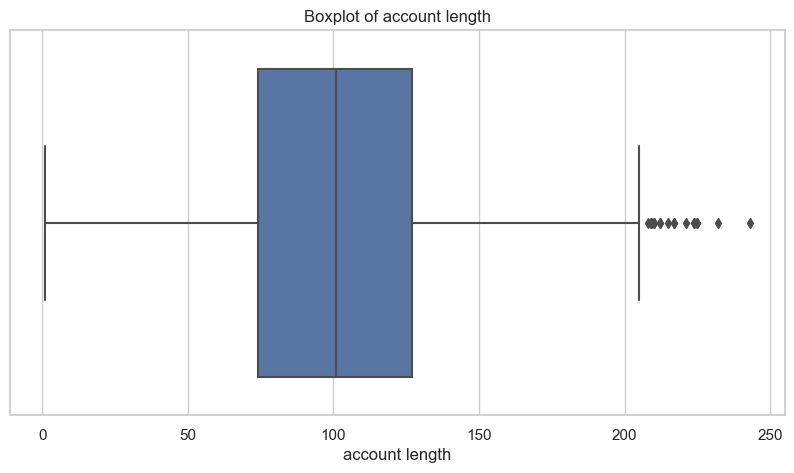

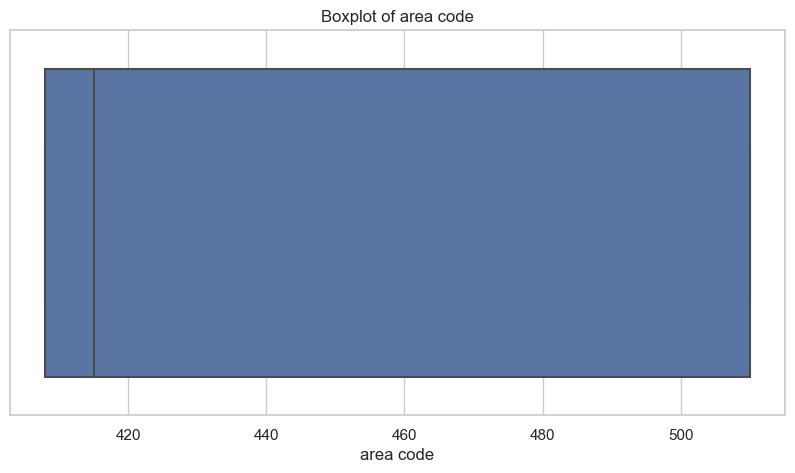

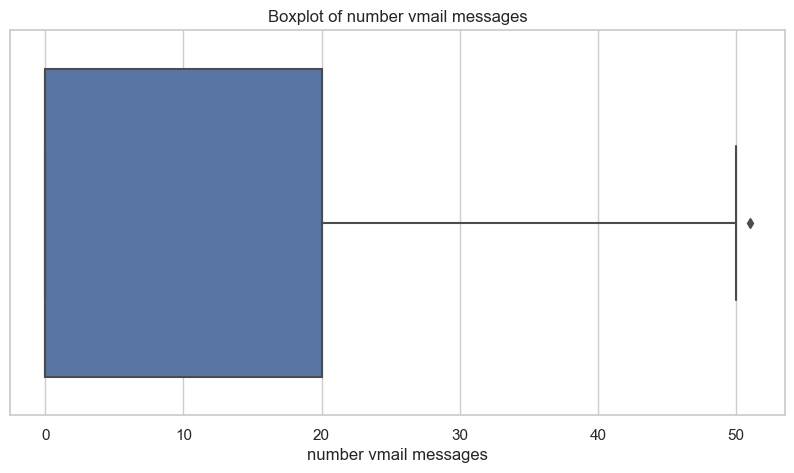

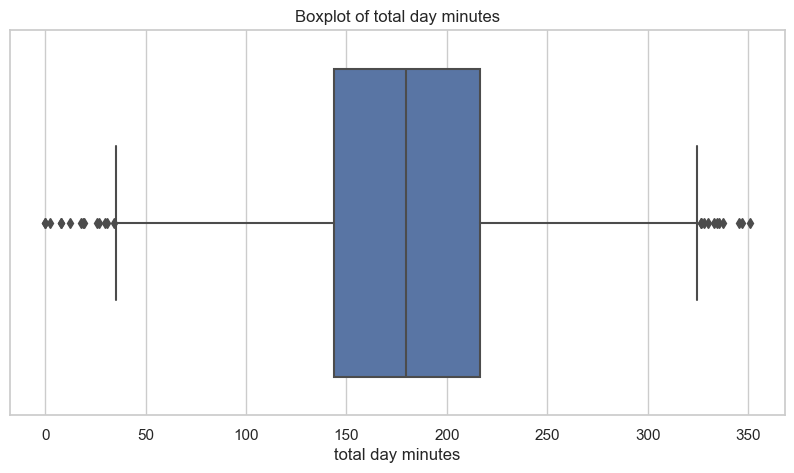

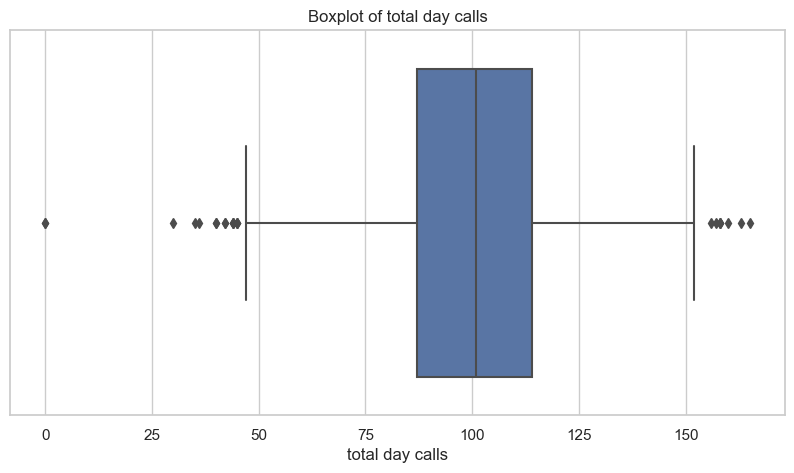

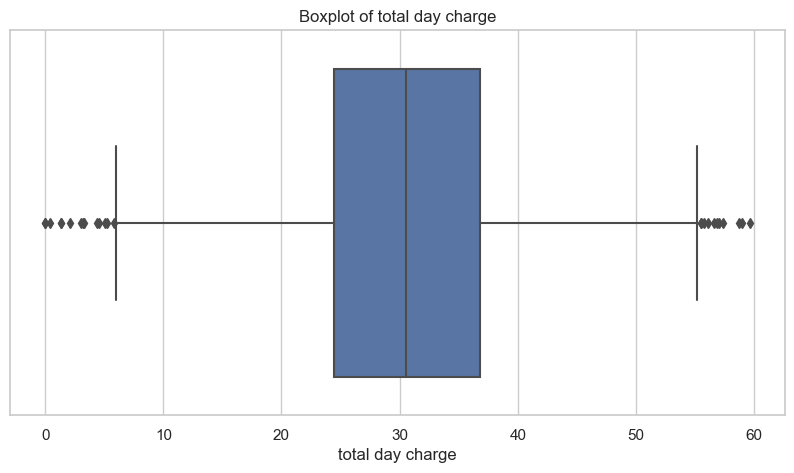

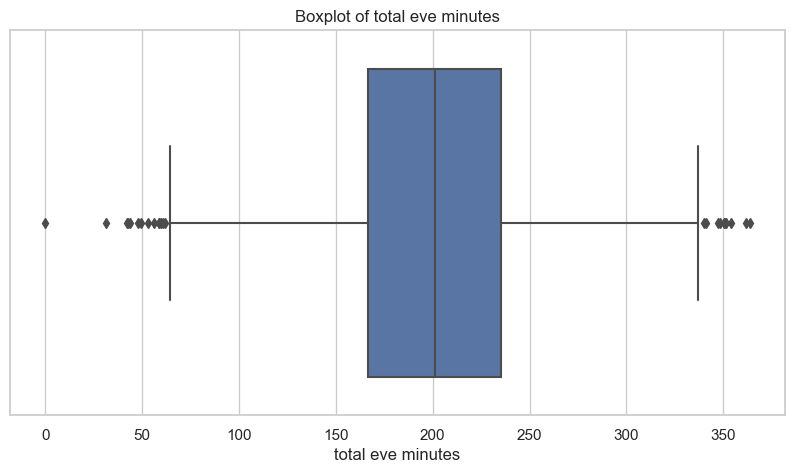

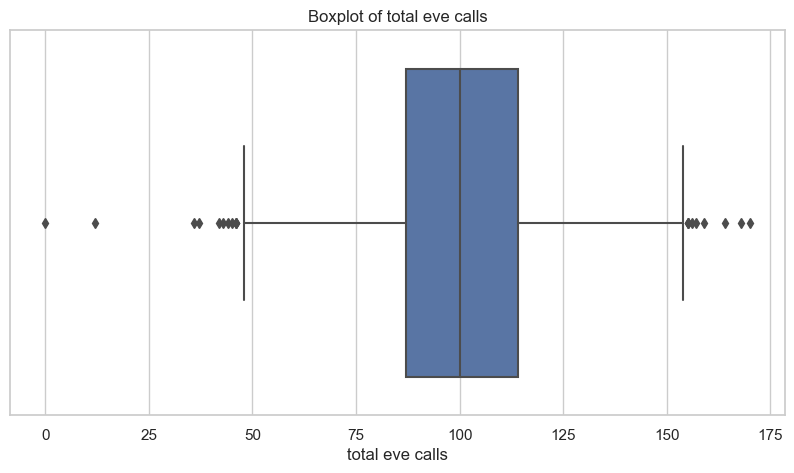

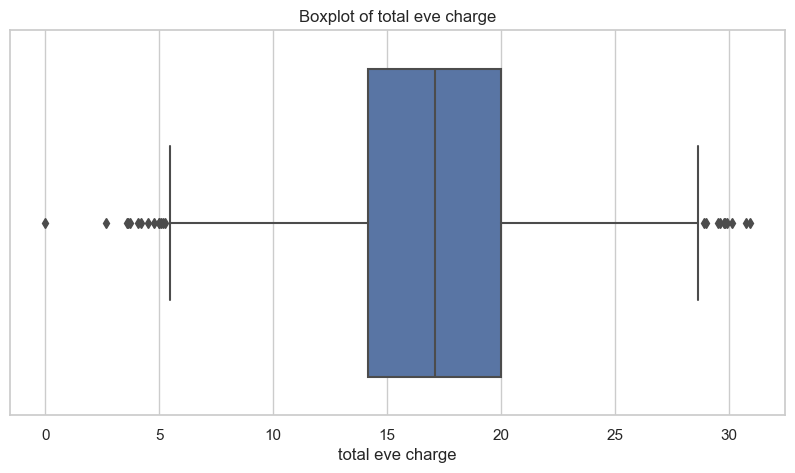

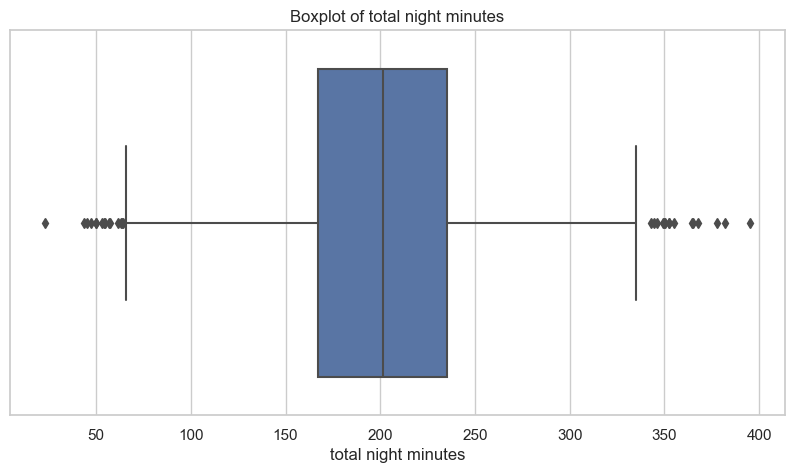

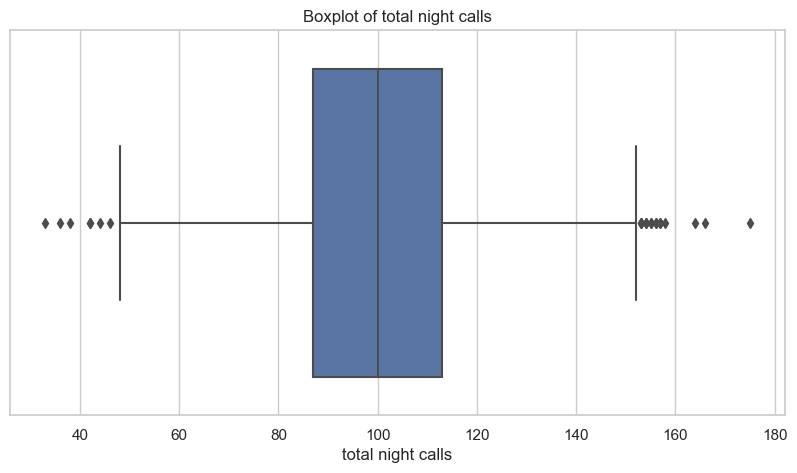

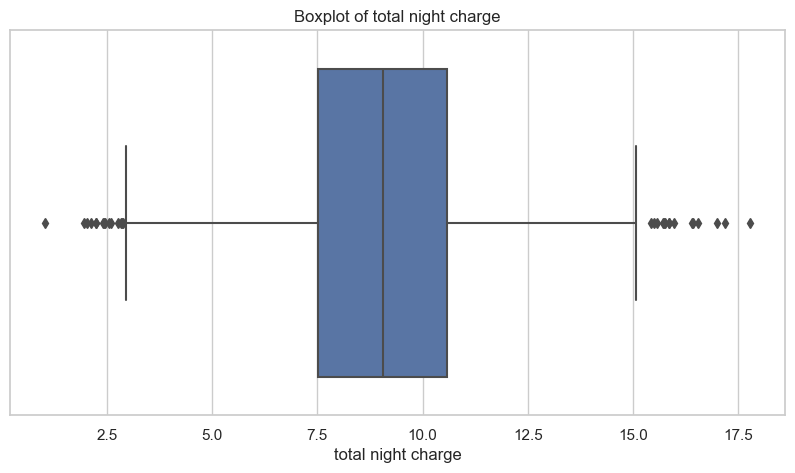

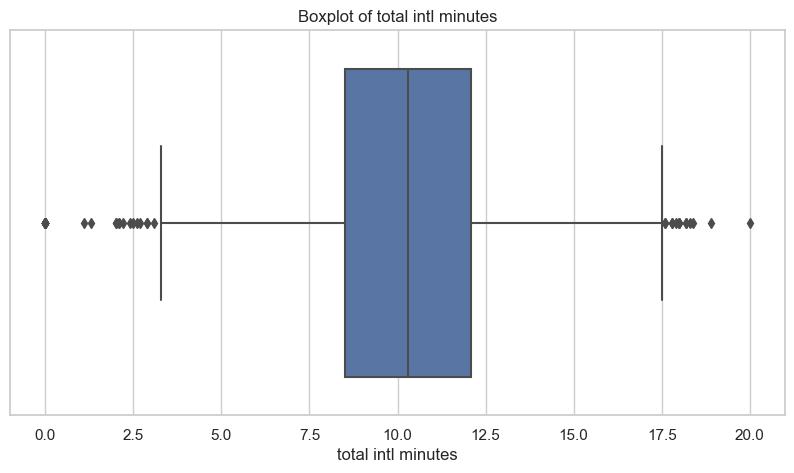

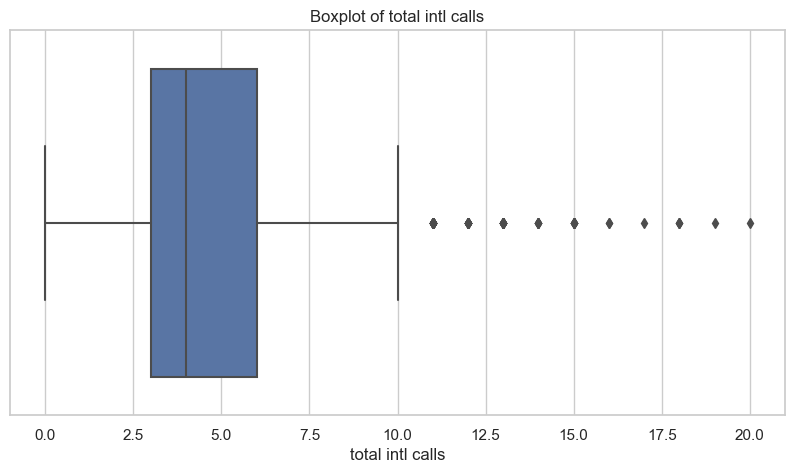

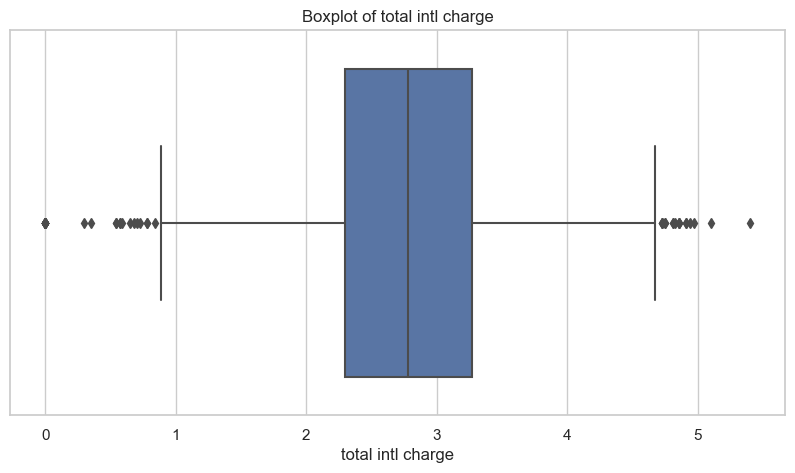

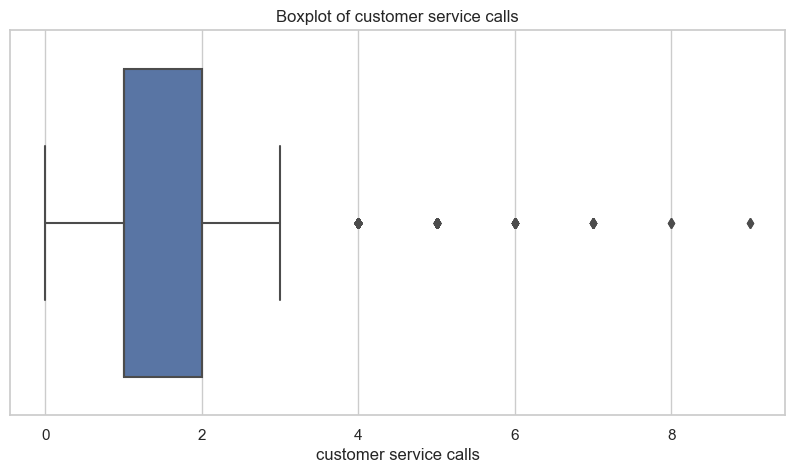

In [117]:
visualizer = BoxplotVisualizer(df[numerical])
visualizer.draw_boxplots()

There's some outliers in our variables which can affect our model we will find techniques of tackling them

### Check distribution of Variable  

I will plot the histograms to check distribution to find out if they are skewed or normal, so if they normal I will do extreme Value analysis, and if skewed I will find the IQR

In [118]:
from scipy.stats import norm, skew

class DistributionAnalyzer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def check_distributions(self):
        sns.set(style="whitegrid")
        
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(self.dataframe[column], kde=True)
            
            # Checking skewness
            skewness = self.dataframe[column].skew()
            
            plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
            
            # Analyze distribution
            if abs(skewness) < 0.5:
                print(f'{column} is approximately normally distributed. Consider extreme value analysis.')
            else:
                print(f'{column} is skewed. Consider using IQR for outlier detection.')
    
    def find_IQR(self, column):
        Q1 = self.dataframe[column].quantile(0.25)
        Q3 = self.dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f'IQR for {column}: {IQR}')
        return IQR


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


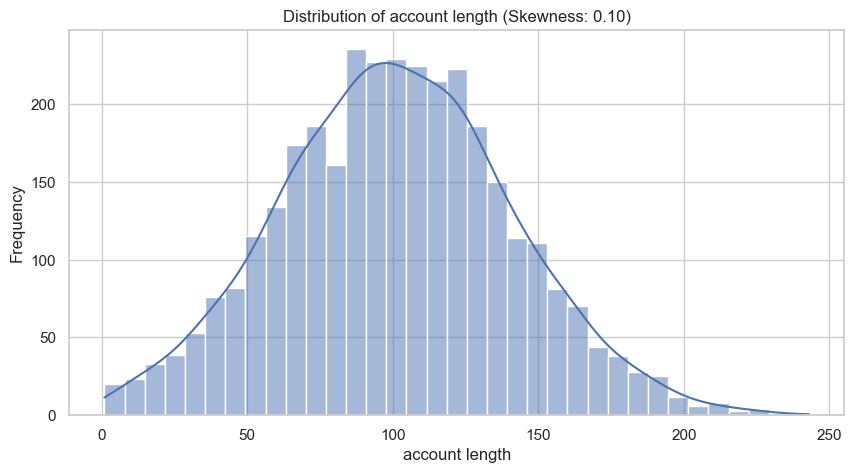

account length is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


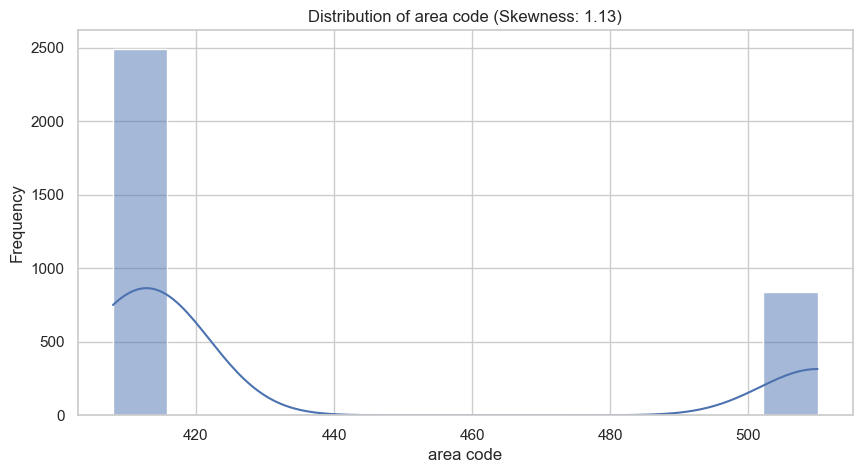

area code is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


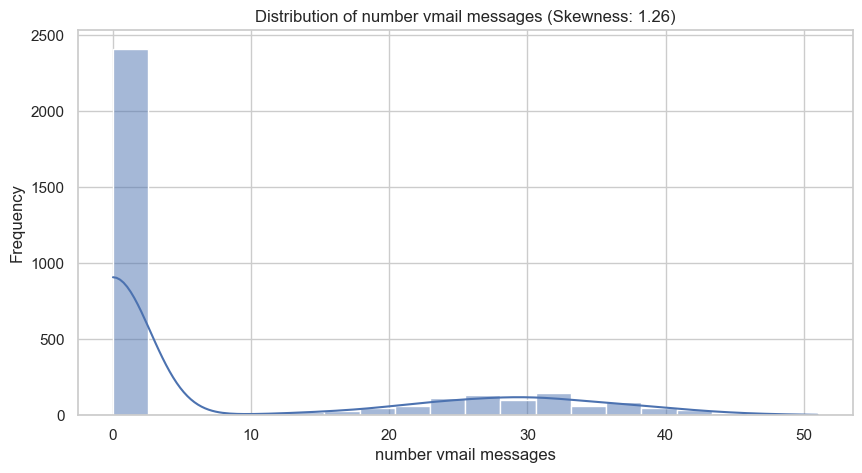

number vmail messages is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


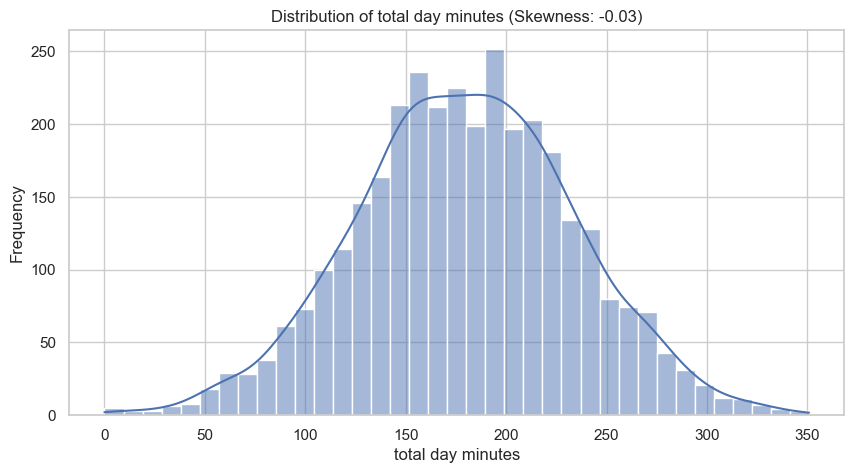

total day minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


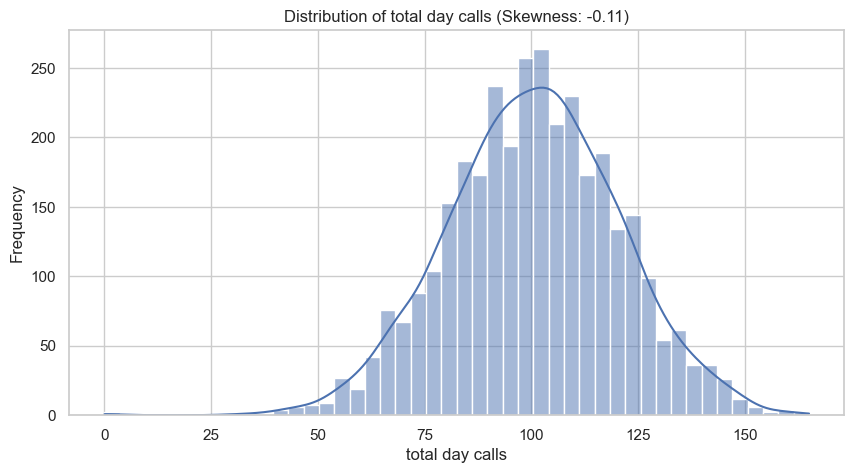

total day calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


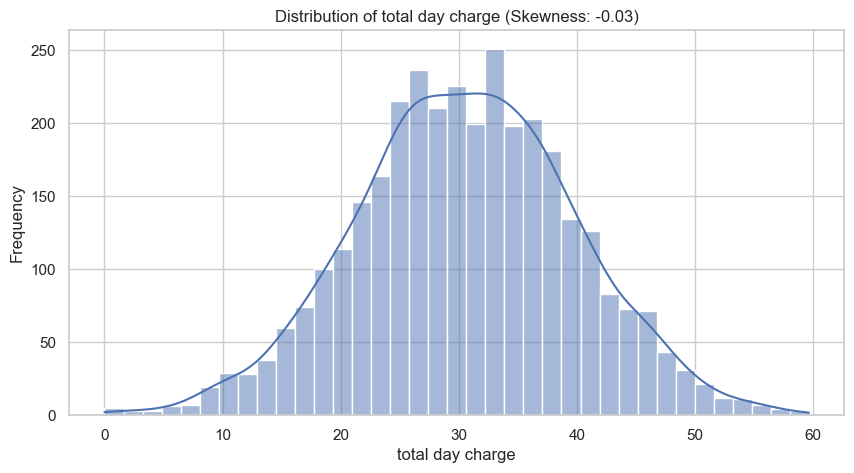

total day charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


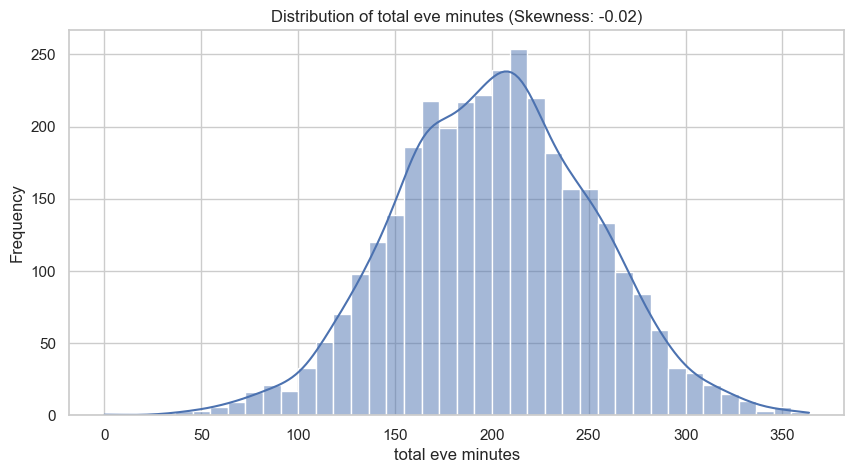

total eve minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


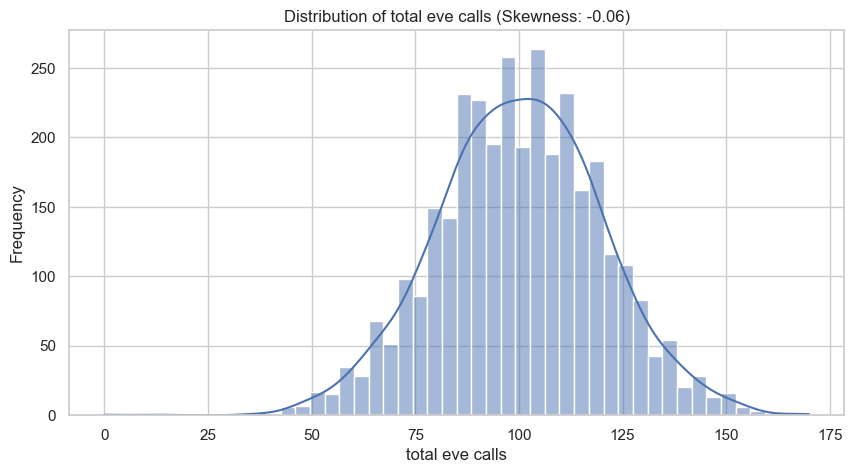

total eve calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


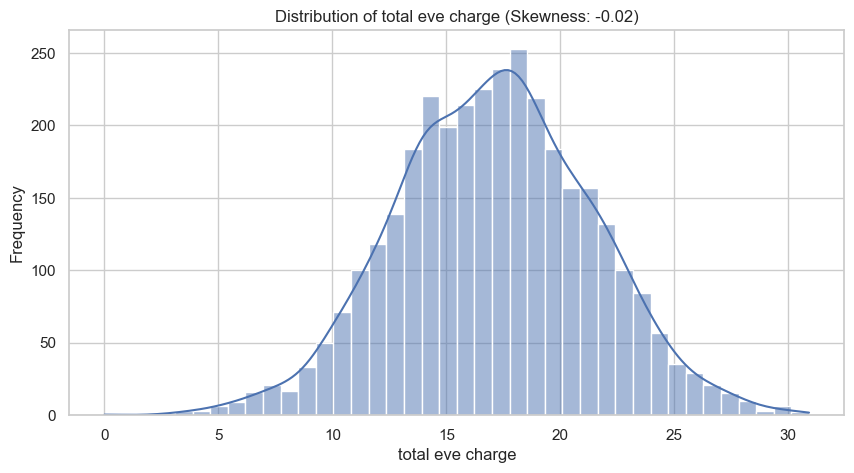

total eve charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


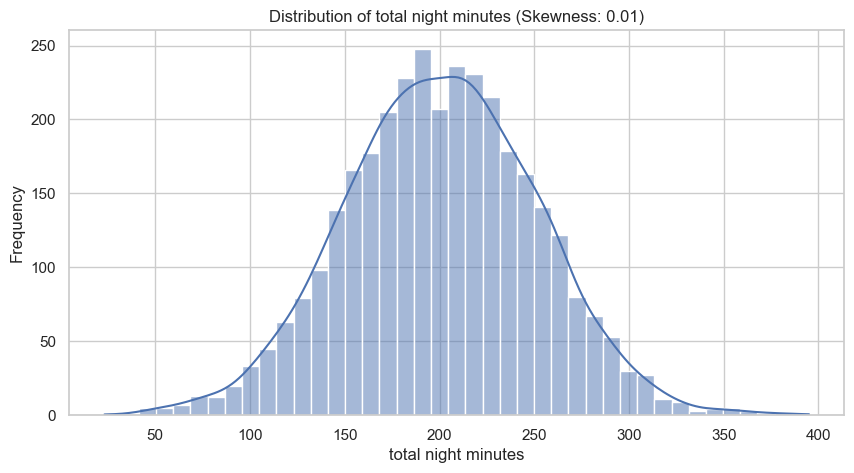

total night minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


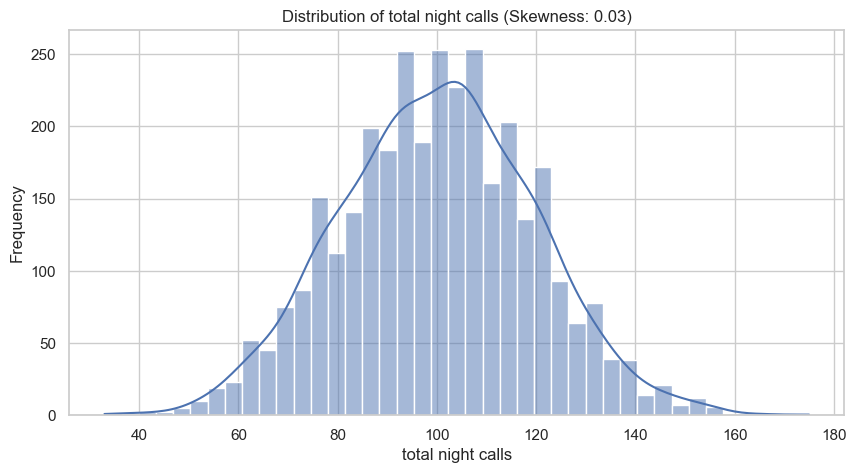

total night calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


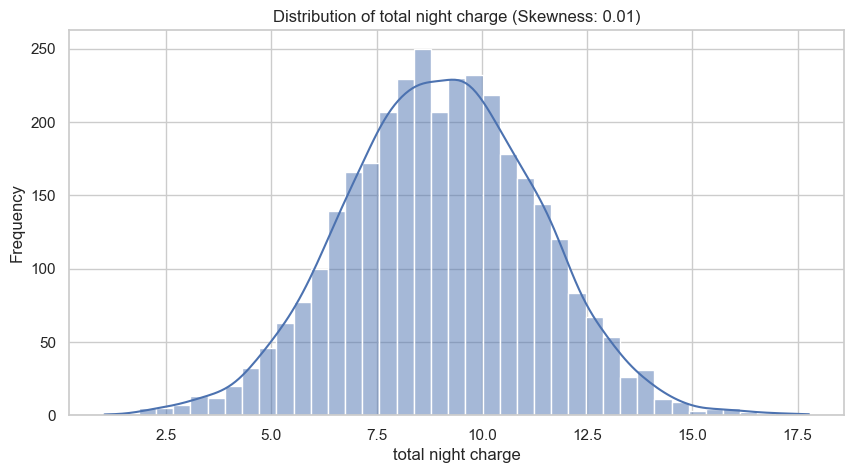

total night charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


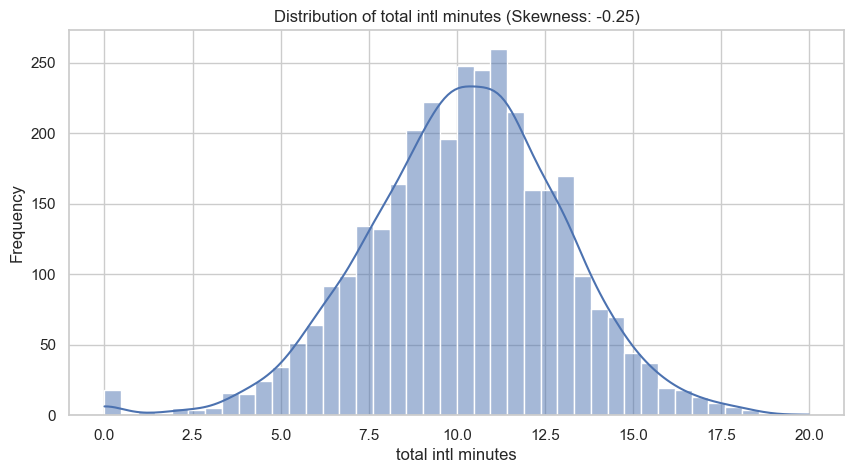

total intl minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


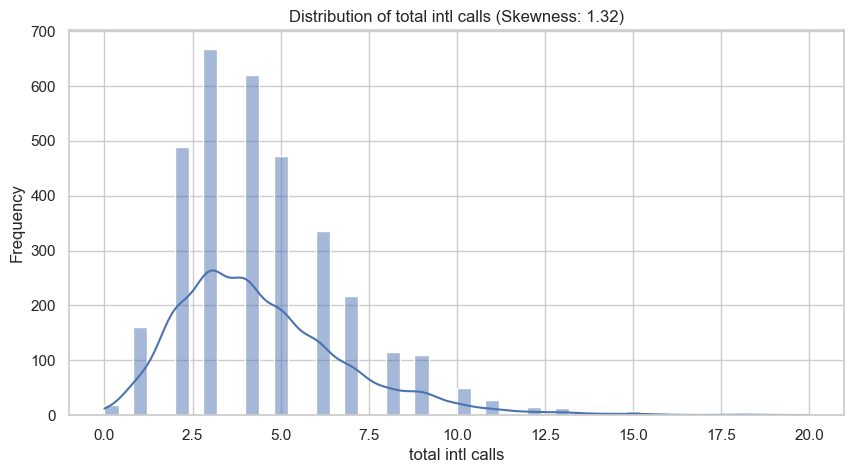

total intl calls is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


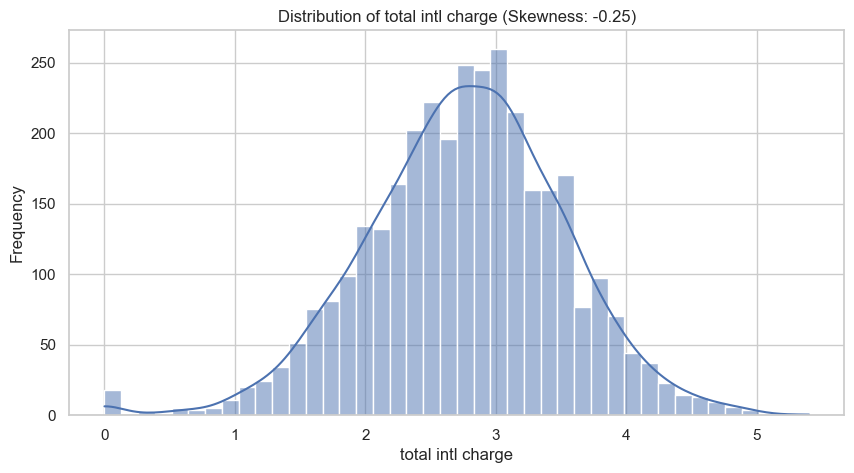

total intl charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


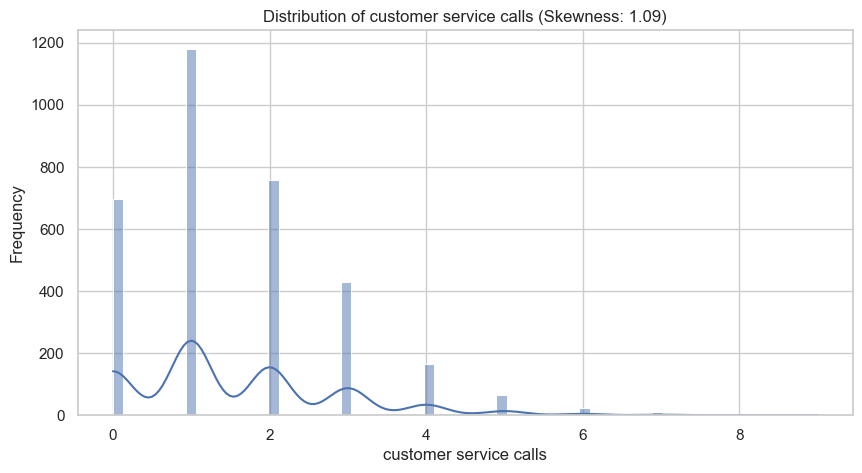

customer service calls is skewed. Consider using IQR for outlier detection.


In [119]:
analyzer = DistributionAnalyzer(df[numerical])
analyzer.check_distributions()

### Handling Normal outliers

In [120]:
from scipy.stats import zscore

def handle_normal_outliers(df, columns):
    for column in columns:
        df[f'{column}_zscore'] = zscore(df[column])
        outliers = df[(df[f'{column}_zscore'] > 3) | (df[f'{column}_zscore'] < -3)]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[(df[f'{column}_zscore'] <= 3) & (df[f'{column}_zscore'] >= -3)]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=df[column].quantile(0.01), upper=df[column].quantile(0.99))

    return df.drop([f'{column}_zscore' for column in columns], axis=1)

normal_columns = [
    'account length', 'total day minutes', 'total day calls', 'total day charge', 
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 'total intl charge'
]

df = handle_normal_outliers(df, normal_columns)


account length has 7 outliers.
total day minutes has 9 outliers.
total day calls has 9 outliers.
total day charge has 9 outliers.
total eve minutes has 9 outliers.
total eve calls has 7 outliers.
total eve charge has 9 outliers.
total night minutes has 11 outliers.
total night calls has 6 outliers.
total night charge has 11 outliers.
total intl minutes has 22 outliers.
total intl charge has 22 outliers.


In [121]:
from scipy.stats import zscore

class NormalOutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_zscore(self, column, threshold=3):
        z_scores = zscore(self.dataframe[column])
        lower_fence = self.dataframe[column].mean() - threshold * self.dataframe[column].std()
        upper_fence = self.dataframe[column].mean() + threshold * self.dataframe[column].std()
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
normal_outlier_detector = NormalOutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in normal_columns:
    normal_outlier_detector.find_outliers_zscore(column)


account length outliers are values < -18.401511305138754 or > 220.53112426643486
total day minutes outliers are values < 16.372929902636656 or > 343.1772651168652
total day calls outliers are values < 40.22839094245388 or > 160.642896186259
total day charge outliers are values < 2.7840035689315528 or > 58.3406108925146
total eve minutes outliers are values < 48.838814757367714 or > 353.1218813122392
total eve calls outliers are values < 40.34643554931384 or > 159.88218731297238
total eve charge outliers are values < 4.151537424704387 or > 30.01554328336642
total night minutes outliers are values < 49.15049616274547 or > 352.59357824469527
total night calls outliers are values < 41.401882732901264 or > 158.81353880925295
total night charge outliers are values < 2.2117064195131544 or > 15.866943445473344
total intl minutes outliers are values < 1.861775084147677 or > 18.6128123745982
total intl charge outliers are values < 0.5032636201566785 or > 5.02589929613495


### Handling Skewed Outliers

In [122]:
def handle_skewed_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

    return df

skewed_columns = ['area code', 'number vmail messages', 'total intl calls', 'customer service calls']

df = handle_skewed_outliers(df, skewed_columns)


area code has 0 outliers.
number vmail messages has 1 outliers.
total intl calls has 78 outliers.
customer service calls has 267 outliers.


In [123]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_iqr(self, column):
        IQR = self.dataframe[column].quantile(0.75) - self.dataframe[column].quantile(0.25)
        lower_fence = self.dataframe[column].quantile(0.25) - (IQR * 3)
        upper_fence = self.dataframe[column].quantile(0.75) + (IQR * 3)
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
outlier_detector = OutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in skewed_columns:
    outlier_detector.find_outliers_iqr(column)


area code outliers are values < 102.0 or > 816.0
number vmail messages outliers are values < -60.0 or > 80.0
total intl calls outliers are values < -6.0 or > 15.0
customer service calls outliers are values < -2.0 or > 5.0


### Declare Feature Vector and target Variable

In [124]:
X = df.drop('churn', axis=1)
y = df['churn'].astype(int)


In [125]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

### Split data into separate training and test set

In [126]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 19), (667, 19))

## Feature Engineering

First, I will display the categorical and numerical variables again separately

In [128]:
# check data types in X_train

X_train.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [129]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['state', 'international plan', 'voice mail plan']

In [130]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [131]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [132]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

### Handling outliers

In [133]:
# Define the thresholds for outliers
lower_thresholds = {
    'account length': -18.401511305138754,
    'total day minutes': 16.372929902636656,
    'total day calls': 40.22839094245388,
    'total day charge': 2.7840035689315528,
    'total eve minutes': 48.838814757367714,
    'total eve calls': 40.34643554931384,
    'total eve charge': 4.151537424704387,
    'total night minutes': 49.15049616274547,
    'total night calls': 41.401882732901264,
    'total night charge': 2.2117064195131544,
    'total intl minutes': 1.861775084147677,
    'total intl charge': 0.5032636201566785
}

upper_thresholds = {
    'account length': 220.53112426643486,
    'total day minutes': 343.1772651168652,
    'total day calls': 160.642896186259,
    'total day charge': 58.3406108925146,
    'total eve minutes': 353.1218813122392,
    'total eve calls': 159.88218731297238,
    'total eve charge': 30.01554328336642,
    'total night minutes': 352.59357824469527,
    'total night calls': 158.81353880925295,
    'total night charge': 15.866943445473344,
    'total intl minutes': 18.6128123745982,
    'total intl charge': 5.02589929613495
}

# Apply the clipping
for df in [X_train, X_test]:
    for column in lower_thresholds.keys():
        df[column] = df[column].clip(lower=lower_thresholds[column], upper=upper_thresholds[column])

# Check the result
print(X_train.head())


     state  account length  area code international plan voice mail plan  \
1460    MT            80.0        415                 no              no   
2000    PA            28.0        415                 no              no   
666     OR           120.0        415                 no              no   
2962    SD           105.0        415                 no              no   
2773    NJ           134.0        510                 no             yes   

      number vmail messages  total day minutes  total day calls  \
1460                      0              198.1            160.0   
2000                      0              168.2             87.0   
666                       0              252.0            120.0   
2962                      0              251.6             88.0   
2773                     34              247.2            105.0   

      total day charge  total eve minutes  total eve calls  total eve charge  \
1460             33.68              156.7             87.0  

In [134]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
X_train.drop('state', axis=1, inplace=True) 
X_test.drop('state', axis=1, inplace=True)
# Initialize the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit the encoder on the categorical columns of X_train
categorical_cols = ["international plan", "voice mail plan"]
ohe.fit(X_train[categorical_cols])

# Transform the categorical columns in both training and test data
X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Convert the encoded features to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X_train and X_test
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

# Concatenate the encoded features with the remaining features
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Check the result
X_train.head()


c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,80.0,415,0,198.1,160.0,33.68,156.7,87.0,13.32,182.1,76.0,8.19,9.3,3,2.51,3,1.0,0.0,1.0,0.0
1,28.0,415,0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112.0,8.66,10.1,3,2.73,3,1.0,0.0,1.0,0.0
2,120.0,415,0,252.0,120.0,42.84,150.2,106.0,12.77,151.8,96.0,6.83,9.6,1,2.59,2,1.0,0.0,1.0,0.0
3,105.0,415,0,251.6,88.0,42.77,175.1,103.0,14.88,184.4,112.0,8.30,5.4,5,1.46,1,1.0,0.0,1.0,0.0
4,134.0,510,34,247.2,105.0,42.02,225.5,133.0,19.17,186.3,76.0,8.38,6.1,5,1.65,2,1.0,0.0,0.0,1.0


In [135]:
X_train[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.341030,437.351838,7.998500,179.973798,100.440810,30.596083,201.603623,100.107289,17.136517,201.179147,100.055826,9.053137,10.250605,4.477494,2.768160,1.554389
std,39.869790,42.488511,13.572182,54.165315,20.035678,9.208086,50.910233,19.895243,4.327401,50.406041,19.767846,2.268319,2.775876,2.439908,0.749458,1.317883
min,1.000000,408.000000,0.000000,16.372930,40.228391,2.784004,48.838815,40.346436,4.151537,49.150496,41.401883,2.211706,1.861775,0.000000,0.503264,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,220.531124,510.000000,51.000000,343.177265,160.642896,58.340611,353.121881,159.882187,30.015543,352.593578,158.813539,15.866943,18.612812,20.000000,5.025899,9.000000


outliers are now capped now lets proceed to feature scaling

### Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
print(X_train_scaled.head())


   account length  area code  number vmail messages  total day minutes  \
0       -0.510282  -0.526167              -0.589441           0.334709   
1       -1.814773  -0.526167              -0.589441          -0.217409   
2        0.493172  -0.526167              -0.589441           1.329997   
3        0.116877  -0.526167              -0.589441           1.322611   
4        0.844381   1.710152               1.916153           1.241363   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         2.973214          0.334977          -0.882181        -0.658939   
1        -0.670970         -0.217902          -0.783951        -0.407575   
2         0.976401          1.329941          -1.009881         0.296243   
3        -0.621049          1.322338          -0.520693         0.145424   
4         0.227596          1.240872           0.469471         1.653605   

   total eve charge  total night minutes  total night calls  \
0         -0.882107            -0.3